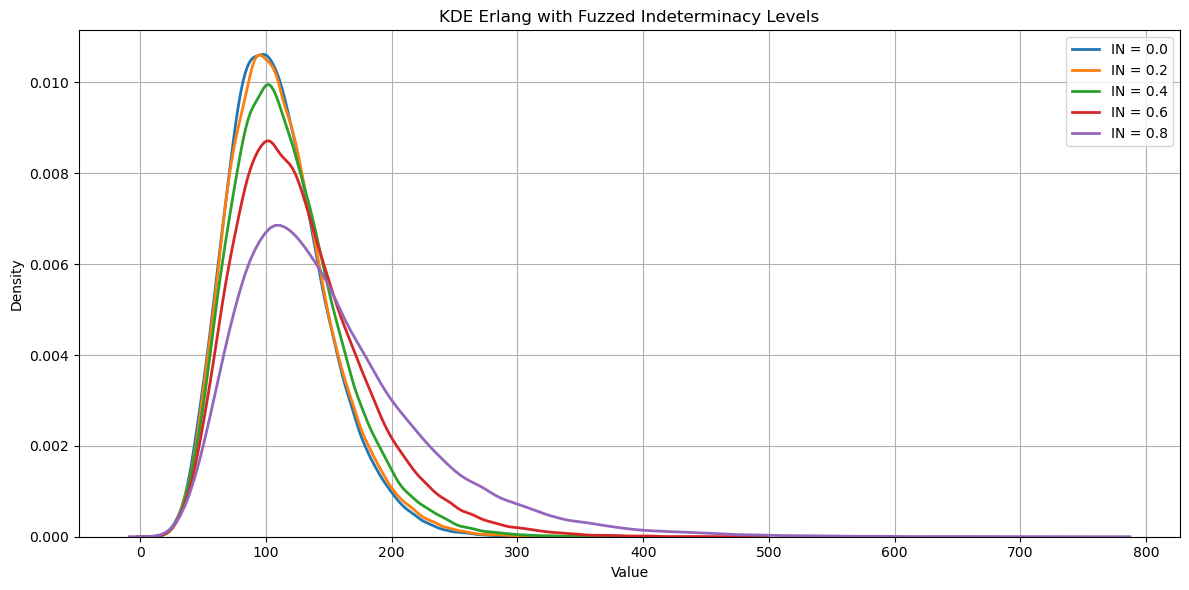

       type        mean        std      skew  kurtosis      ks_pvalue
0  IN = 0.0  109.723316  38.776783  0.700900  0.752182   1.165905e-01
1  IN = 0.2  111.396321  39.915577  0.752455  0.861035   4.980662e-17
2  IN = 0.4  116.527797  43.576432  0.827359  1.097096  3.084685e-315
3  IN = 0.6  127.074907  52.245129  1.033467  1.744400   0.000000e+00
4  IN = 0.8  151.066180  74.669508  1.432885  3.395381   0.000000e+00


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, kstest
import math
import random

# 1. Hàm sinh dữ liệu Erlang
def generate_classic_erlang(k, lam, size):
    return np.random.gamma(shape=k, scale=1 / lam, size=size)
def fuzz_param(param,IN):
    res = random.uniform(param*(1-IN),param*(1+IN))
    return res
def generate_fuzzed_neutrosophic_erlang(k, expected_value, IN, size):
    theta_mean = k / expected_value
    results = []
    for _ in range(size):
        xN = sum(-math.log(1 - random.uniform(0, 1)) / fuzz_param(theta_mean,IN) for _ in range(k))
        results.append(xN)
    return np.array(results)

# 2. Hàm tính thống kê
def summarize(data, label, k, lam):
    return {
        "type": label,
        "mean": np.mean(data),
        "std": np.std(data),
        "skew": skew(data),
        "kurtosis": kurtosis(data),
        "ks_pvalue": kstest(data, 'gamma', args=(k, 0, 1 / lam)).pvalue
    }

# 3. Phân tích và vẽ
def run_erlang_neutrosophic_analysis():
    k = 8
    expected_value = 110
    lam = k / expected_value
    size = 100000
    IN_list = [0.0, 0.2, 0.4, 0.6, 0.8]

    data_dict = {}
    summary = []

    for IN in IN_list:
        if IN == 0.0:
            label = "IN = 0.0"
            data = generate_classic_erlang(k, lam, size)
        else:
            label = f"IN = {IN}"
            data = generate_fuzzed_neutrosophic_erlang(k, expected_value, IN, size)

        data_dict[label] = data
        summary.append(summarize(data, label, k, lam))

    # Vẽ KDE
    plt.figure(figsize=(12, 6))
    for label, data in data_dict.items():
        sns.kdeplot(data, label=label, linewidth=2)
    plt.title("KDE Erlang with Fuzzed Indeterminacy Levels")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # In bảng thống kê
    import pandas as pd
    df = pd.DataFrame(summary)
    print(df)

run_erlang_neutrosophic_analysis()
